In [1]:
import os
import sys
DIR = os.path.normpath(os.getcwd() + os.sep + os.pardir) + '/MLQD'
path_to_file = str(DIR) + '/' + 'evolution.py'
if os.path.isfile(path_to_file):
    MLQD_DIR = DIR
else:
    MLQD_DIR = os.getcwd() + '/MLQD'
if MLQD_DIR not in sys.path:
    sys.path.append(MLQD_DIR)

In [2]:
import numpy as np
from evolution import quant_dyn
import matplotlib.pyplot as plt

We consider spin-boson model as was consider in our published study https://iopscience.iop.org/article/10.1088/1367-2630/ac3261

\begin{align} \label{eq:sb}
    \boldsymbol{\rm H} = \frac{1}{2}\epsilon \boldsymbol{\sigma}_{z}  + \frac{1}{2}\Delta \boldsymbol{\sigma}_{x} + \sum_{k} \omega_k \boldsymbol{\rm b}_k^\dagger \boldsymbol{\rm b}_k + \frac{1}{2} \boldsymbol{\sigma}_z \boldsymbol{\rm F},
\end{align}
here $\boldsymbol{\sigma}_z$ and $\boldsymbol{\sigma}_x$ are the Pauli matrices, i.e., $\boldsymbol{\sigma}_z = | e\rangle \langle e| - | g \rangle \langle g|$, $\boldsymbol{\sigma}_x =  |e\rangle \langle g| + | g \rangle \langle  e|$. $\epsilon$ and $\Delta$ are the energy bias and tunneling matrix element, respectively. $\omega_k$ is the frequency corresponds to $k$ bath mode and $\boldsymbol{\rm b}_k^\dagger$ is the corresponding bath creation operator. $\boldsymbol{\rm F}$ is the interaction operator and can be expressed as $\boldsymbol{\rm F} = \sum_k \frac{c_k}{\sqrt{2 \omega_k}} (\boldsymbol{\rm b}_k + \boldsymbol{\rm b}_k^\dagger)$, where $c_k$ denotes the coupling strength between system and $k$ bath mode. Initially, we consider that the system is in the excited state $|e\rangle$ (by absorbing a photon of energy equal to the energy gap between the two states) and we let the system to be relaxed by exchanging its energy with the bath.  

We consider the Drude–Lorentz spectral density 
$$
    J_{\text{b}}(\omega)=2 \lambda \frac{\omega \gamma}{\omega^{2}+\gamma^{2}},
$$
with $\gamma$ as characteristic frequency and $\lambda$ as the reorganization energy.

We use the Hierarchical equations of motion (HEOM) approach and generate data for all the possible combinations of the following parameters: $\epsilon = \{0, 1\}$, the reorganization energy $\lambda \in \{0.1$, $0.2$, $0.3$, $0.4$, $0.5$, $0.6$, $0.7$, $0.8$, $0.9$, $1.0 \},$ the characteristic frequency $\gamma \in \{1$, $2$, $3$, $4$, $5$, $6$, $7$, $8$, $9$, $10\},$ inverse temperature $\beta = 1/T \in \{0.1$, $0.25$, $0.5$, $0.75$, $1\}$. It should be noted that all parameters are in atomic units (a.u.). 

We generate 500 trajectories for each case (symmetric and asymmetric $\epsilon = \{0, 1\}$) and then train a CNN model following the OSTL approach. You can grab the trajectories from our **QDDSET-1 dataset** [Coming Soon]. **However, here for the sake of demonstration, we provide 20 trajectories in the ```sb_data``` folder.** 

## OSTL approach

We prepare our training data using parameters {$\epsilon$, $\Delta$, $\gamma$,  $\lambda$,  $\beta$}.

The OSTL was trained on and also predicts the whole dynamics in one shot in the following format $$\boldsymbol{\mathcal{Y}}(t_0), \boldsymbol{\mathcal{Y}}(t_1), \dots, \boldsymbol{\mathcal{Y}}(t_{k-1}), \boldsymbol{\mathcal{Y}}(t_k),  \boldsymbol{\mathcal{Y}}(t_{k+1}), \dots,  \boldsymbol{\mathcal{Y}}(t_M)$$ 
where 
$$\boldsymbol{\mathcal{Y}}(t) = \mathcal{R}[\rho_{11}(t)], \mathcal{R}[\rho_{12}(t)], \mathcal{I}[\rho_{12}(t)] \dots, \mathcal{R}[\rho_{1N}(t)], \mathcal{I}[\rho_{1N}(t)], \mathcal{R}[\rho_{22}(t)], \dots, \mathcal{R}[\rho_{2N}(t)], \mathcal{I}[\rho_{2N}(t)], \mathcal{R}[\rho_{33}(t)], \dots, \mathcal{R}[\rho_{3N}(t)],\mathcal{I}[\rho_{3N}(t)],\dots, \dots,   \mathcal{R}[\rho_{NN}(t)]$$ 

where $N$ is the dimension of the reduced density matrix and $\mathcal{R}$ and $\mathcal{I}$ represent the real and imaginary parts of the off-diagonal terms, respectively.  

More details are here 

[One-Shot Trajectory Learning of Open Quantum Systems Dynamics]( https://doi.org/10.1021/acs.jpclett.2c01242 "Named link title") 

## User-Manual 

call ```quant_dyn``` with out passing any parameters

In [3]:
quant_dyn()

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.0.0
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2022 Arif Ullah

All rights reserved. This work is licensed under the Attribution-NonCommercial-NoDerivatives 4.0
 	 International http://creativecommons.org/licenses/by-nc-nd/4.0/) license.
			 See LICENSE.CC-BY-NC-ND-4.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 C

### 1. Training with preparation of training data and optimization of the CNN model

We provide 20 trajectories in ```sb_data``` for the sake of demonstration. Each trajectory is propagated with HEOM method upto ```t= 20 (a.u.)``` with time-step ```dt = 0.05```. 

In [4]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'prepInput' : 'True',           # str: Prepare input files from the data (Default 'False')
        'XfileIn': 'x_data_sb',            # str: (Optional, npy file) The prepared X file will be saved at the provided file name 
        'YfileIn': 'y_data_sb',            # str: (Optional, npy file) The prepared Y file will be saved at the provided file name 
        'energyNorm': 1.0,              # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,               # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10,                # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                # float: Normalizer for inverse temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
        'systemType': 'SB',             # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'hyperParam': 'True',           # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default structure)
        'patience': 10,                 # int: Patience for early stopping in CNN training
        'epochs': 10,                   # int: Number of epochs for NN optimization and training 
        'max_evals': 10,                # int: Maximum number of evaluations in the case of hyperopt optimization
        'dataPath': 'sb_data',          # str: Data path
        'QDmodelOut': 'OSTL_SB_model'   # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.0.0
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2022 Arif Ullah

All rights reserved. This work is licensed under the Attribution-NonCommercial-NoDerivatives 4.0
 	 International http://creativecommons.org/licenses/by-nc-nd/4.0/) license.
			 See LICENSE.CC-BY-NC-ND-4.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 C

Epoch 8/10                                                                       

1/1 - 0s - loss: 0.1496 - val_loss: 0.1426 - 336ms/epoch - 336ms/step            

Epoch 9/10                                                                       

1/1 - 0s - loss: 0.1496 - val_loss: 0.1426 - 364ms/epoch - 364ms/step            

Epoch 10/10                                                                      

1/1 - 0s - loss: 0.1496 - val_loss: 0.1425 - 381ms/epoch - 381ms/step            

Epoch 1/10                                                                       

1/1 - 1s - loss: 0.1497 - val_loss: 0.1417 - 1s/epoch - 1s/step                  

Epoch 2/10                                                                       

1/1 - 0s - loss: 0.1487 - val_loss: 0.1407 - 313ms/epoch - 313ms/step            

Epoch 3/10                                                                       

1/1 - 0s - loss: 0.1476 - val_loss: 0.1394 - 347ms/epoch - 347ms/step            

Epoc

Epoch 7/10                                                                        

1/1 - 0s - loss: 0.1496 - val_loss: 0.1425 - 426ms/epoch - 426ms/step             

Epoch 8/10                                                                        

1/1 - 0s - loss: 0.1495 - val_loss: 0.1425 - 265ms/epoch - 265ms/step             

Epoch 9/10                                                                        

1/1 - 0s - loss: 0.1495 - val_loss: 0.1425 - 248ms/epoch - 248ms/step             

Epoch 10/10                                                                       

1/1 - 0s - loss: 0.1495 - val_loss: 0.1425 - 379ms/epoch - 379ms/step             

Epoch 1/10                                                                        

1/1 - 1s - loss: 0.1504 - val_loss: 0.1432 - 1s/epoch - 1s/step                   

Epoch 2/10                                                                        

1/1 - 0s - loss: 0.1503 - val_loss: 0.1431 - 485ms/epoch - 485ms/step       

### 2. Training with preparation of training data but No optimization of the CNN model

In [5]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'prepInput' : 'True',             # str: Prepare input files from the data (Default 'False')
        'XfileIn': 'x_data_sb',            # str: (Optional, npy file) The prepared X file will be saved at the provided file name 
        'YfileIn': 'y_data_sb',            # str: (Optional, npy file) The prepared Y file will be saved at the provided file name 
        'energyNorm': 1.0,              # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,               # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10,               # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                # float: Normalizer for inverse temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
        'systemType': 'SB',            # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'hyperParam': 'False',          # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default structure)
        'patience': 10,                 # int: Patience for early stopping in CNN training
        'epochs': 10,                   # int: Number of epochs for NN optimization and training 
        'dataPath': 'sb_data',         # str: Data path
        'QDmodelOut': 'OSTL_SB_model'  # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.0.0
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2022 Arif Ullah

All rights reserved. This work is licensed under the Attribution-NonCommercial-NoDerivatives 4.0
 	 International http://creativecommons.org/licenses/by-nc-nd/4.0/) license.
			 See LICENSE.CC-BY-NC-ND-4.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 C

### 3. Training without preparation of training data and optimization of the CNN model. 

In this example, we will not prepare the training data and will directly pass the X and Y files as were prepared in demonstration 1 or 2. Here we still need to provide the normalization constants in order to save them. 

In [6]:
param={ 
        'n_states': 2,                  # int:  Number of states (SB) or sites (FMO), default 2 (SB) and 7 (FMO).
        'QDmodel': 'createQDmodel',     # str: createQDmodel, the dafault option is useQDmodel
        'QDmodelType': 'OSTL',          # str: Type of model. The default option is OSTL
        'systemType': 'SB',             # str: (Not optional) Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'prepInput' : 'False',          # str: Do not prepare input files from the data (Default option is also 'False')
        'XfileIn': 'x_data_sb',         # str: (Not Optional, npy file) The X file 
        'YfileIn': 'y_data_sb',         # str: (Not Optional, npy file) The X file
        'energyNorm': 1.0,              # float: Normalizer for energy difference. Default value is 1.0 (adopted in the provided trained models)
        'DeltaNorm': 1.0,               # float: Normalizer for Delta. Default value is 1.0 (adopted in the provided trained models)
        'gammaNorm': 10,                # float: Normalizer for Characteristic frequency. Default value is 500 in the case of FMO complex and 10 in the case of spin-boson model. The same values are also adopted in the provided trained models  
        'lambNorm': 1.0,                # float: Normalizer for System-bath coupling strength. Default value is 520 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models 
        'tempNorm': 1.0,                # float: Normalizer for inverse temperature. Default value is 510 (FMO complex) and 1 (SB model). The same values are also adopted in the provided trained models.
        'hyperParam': 'False',          # str: Default is 'False', we can pass 'True' (optimize the hyperparameters) or 'False' (don't optimize and run with the default structure)
        'patience': 20,                 # int: Patience for early stopping in CNN training
        'epochs': 200,                  # int: Number of epochs for NN optimization and training 
        'QDmodelOut': 'OSTL_SB_model'   # str: (Optional), providing a name to save the model at
        }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.0.0
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2022 Arif Ullah

All rights reserved. This work is licensed under the Attribution-NonCommercial-NoDerivatives 4.0
 	 International http://creativecommons.org/licenses/by-nc-nd/4.0/) license.
			 See LICENSE.CC-BY-NC-ND-4.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 C

Epoch 41/200
1/1 - 0s - loss: 0.0067 - val_loss: 0.0074 - 362ms/epoch - 362ms/step
Epoch 42/200
1/1 - 0s - loss: 0.0066 - val_loss: 0.0073 - 304ms/epoch - 304ms/step
Epoch 43/200
1/1 - 0s - loss: 0.0066 - val_loss: 0.0072 - 163ms/epoch - 163ms/step
Epoch 44/200
1/1 - 0s - loss: 0.0065 - val_loss: 0.0070 - 170ms/epoch - 170ms/step
Epoch 45/200
1/1 - 0s - loss: 0.0064 - val_loss: 0.0067 - 209ms/epoch - 209ms/step
Epoch 46/200
1/1 - 0s - loss: 0.0061 - val_loss: 0.0065 - 287ms/epoch - 287ms/step
Epoch 47/200
1/1 - 0s - loss: 0.0059 - val_loss: 0.0064 - 293ms/epoch - 293ms/step
Epoch 48/200
1/1 - 0s - loss: 0.0058 - val_loss: 0.0063 - 357ms/epoch - 357ms/step
Epoch 49/200
1/1 - 0s - loss: 0.0058 - val_loss: 0.0064 - 278ms/epoch - 278ms/step
Epoch 50/200
1/1 - 0s - loss: 0.0059 - val_loss: 0.0064 - 261ms/epoch - 261ms/step
Epoch 51/200
1/1 - 0s - loss: 0.0059 - val_loss: 0.0063 - 190ms/epoch - 190ms/step
Epoch 52/200
1/1 - 0s - loss: 0.0059 - val_loss: 0.0062 - 129ms/epoch - 129ms/step
Epoc

Epoch 140/200
1/1 - 0s - loss: 0.0034 - val_loss: 0.0042 - 280ms/epoch - 280ms/step
Epoch 141/200
1/1 - 0s - loss: 0.0034 - val_loss: 0.0042 - 205ms/epoch - 205ms/step
Epoch 142/200
1/1 - 0s - loss: 0.0034 - val_loss: 0.0042 - 256ms/epoch - 256ms/step
Epoch 143/200
1/1 - 0s - loss: 0.0033 - val_loss: 0.0042 - 247ms/epoch - 247ms/step
Epoch 144/200
1/1 - 0s - loss: 0.0033 - val_loss: 0.0042 - 266ms/epoch - 266ms/step
Epoch 145/200
1/1 - 0s - loss: 0.0033 - val_loss: 0.0042 - 265ms/epoch - 265ms/step
Epoch 146/200
1/1 - 0s - loss: 0.0032 - val_loss: 0.0041 - 307ms/epoch - 307ms/step
Epoch 147/200
1/1 - 0s - loss: 0.0032 - val_loss: 0.0041 - 126ms/epoch - 126ms/step
Epoch 148/200
1/1 - 0s - loss: 0.0032 - val_loss: 0.0041 - 178ms/epoch - 178ms/step
Epoch 149/200
1/1 - 0s - loss: 0.0031 - val_loss: 0.0041 - 183ms/epoch - 183ms/step
Epoch 150/200
1/1 - 0s - loss: 0.0031 - val_loss: 0.0041 - 151ms/epoch - 151ms/step
Epoch 151/200
1/1 - 0s - loss: 0.0031 - val_loss: 0.0041 - 254ms/epoch - 254

# Propagating dynamics with the trained OSTL model 

Here we will demonstrate how to propagate dynamics with the model we trained above "OSTL_SB_model.hdf5". We will provide the simulation parameters and the OSTL will predict the corresponding dynamics. **While training the model, the normalization constants for $\epsilon, \Delta, \gamma, \lambda$ and $\beta$ were saved as a pickle file (with the similar name as the model name). Thus the user does not need to provide them, MLQD will automatically load them.** 

***MLQD is also able to plot the dynamics against the reference trajectory***

In [7]:
param={ 
        'n_states': 2,                          # int:  Number of states (SB) or sites (FMO). Default is 2 (SB) and 7 (FMO).
        'time': 20,                             # float: Propagation time in picoseconds (ps)  for FMO complex and in (a.u.) for spin-boson model
        'time_step': 0.05,                      # float: Time-step for time-propagation (OSTL does not use it, however will use it in the output file). Default values are 0.05 (a.u.) for spin-boson model and 5fs for FMO complex
        'energyDiff': 1.0,                      # float: Energy difference between the two states (in the unit of (a.u.)). Only required in SB model
        'Delta': 1.0,                           # float: The tunneling matrix element (in the unit of (a.u.)). Only required in SB model
        'gamma': 4.0,                           # float: Characteristic frequency (in cm^-1 for the provided trained FMO models, in (a.u.) for spin-boson model)
        'lamb': 0.1,                             # float: System-bath coupling strength  (in cm^-1 for the provided trained FMO models, in (a.u.) for spin-boson model)
        'temp': 1.0,                            # float: inverse temperature in (a.u.) for spin-boson model
        'QDmodel': 'useQDmodel',                # str: In MLQD, the dafault option is useQDmodel tells the MLQD to propagate dynamics with an existing trained model
        'QDmodelType': 'OSTL',                  # str: The type of model we wanna use, here AIQD. The default option is OSTL
        'systemType': 'SB',                     # str: (Not optional)  Need to define, wether your model is spin-boson (SB) or FMO complex (FMO) 
        'QDmodelIn': 'OSTL_SB_model.hdf5',      # str: (Not Optional for useQDmodel), provide the name of the trained ML model
        'QDtrajOut': 'Qd_trajectory',           # str: (Optional), File name where the trajectory should be saved 
        'xlim': 20,                     # Xaxis limit for plotting. Default is equal to propagation time
        'pltNstates': 2,                # How many states to be plotted. Default option is to plot all
        'refTraj':'test_set/sb/2_epsilon-0.0_Delta-1.0_lambda-0.1_gamma-4.0_beta-1.0.npy' # Reference trajectory 
        }
quant_dyn(**param)

MLQD is a python package developed for Machine Learning-based Quantum Dissipative Dynamics,
 				  Version 1.0.0
			 https://github.com/Arif-PhyChem/MLQD

 			 Copyright (c) 2022 Arif Ullah

All rights reserved. This work is licensed under the Attribution-NonCommercial-NoDerivatives 4.0
 	 International http://creativecommons.org/licenses/by-nc-nd/4.0/) license.
			 See LICENSE.CC-BY-NC-ND-4.0


The above copyright notice and this permission notice shall be included 
in all copies or substantial portions of the Software.


The software is provided "as is" without warranty of any kind, express or implied, 
including but not limited to the warranties ofmerchantability, fitness for a particular 
purpose and noninfringement. In no event shall the authors or copyright holders be 
liable for any claim, damages or other liability, whether in an action of contract, tort or otherwise, 
arising from, out of or in connection with the software or the use or other dealings in the software.


				 C

Text(0.5, 1.0, 'Time evolution of the population \n difference in the spin-boson model')

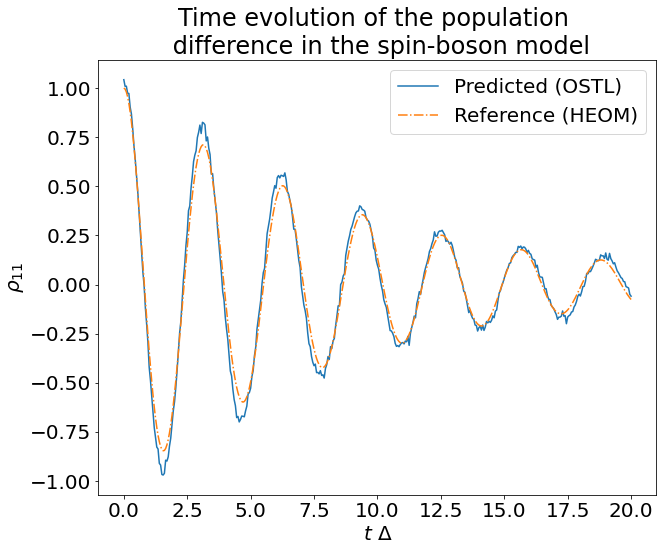

In [8]:
heom_dyn = np.load('test_set/sb/2_epsilon-0.0_Delta-1.0_lambda-0.1_gamma-4.0_beta-1.0.npy')
pred_dyn = np.load('Qd_trajectory.npy')
t_1 = np.real(heom_dyn[:,0])
t_2 = np.real(pred_dyn[:,0])
pred_state_1_pop = np.real(pred_dyn[:,1] - pred_dyn[:,4])
heom_state_1_pop = np.real(heom_dyn[:,1]- heom_dyn[:,4])

plt.rcParams['font.size'] = '20'
plt.figure(figsize=(10,8))
plt.plot(t_2, pred_state_1_pop, )
plt.plot(t_1, heom_state_1_pop, '-.')
plt.xlabel(r'$t \ \Delta$')
plt.ylabel(r'$\rho_{11}$')
plt.legend(["Predicted (OSTL)", 'Reference (HEOM)'])
plt.title('Time evolution of the population \n difference in the spin-boson model')

**As can be seen from the figure, the CNN model needs to be optimized and trained with more epochs**